Kawasaki Quantum Summer Camp 2024

# 量子コンピューター入門

Kifumi Numata, IBM Quantum (Jul 30, 2024)

Google Colab で行う場合は、次のセルの「#」を削除して実行します。

In [ ]:
#!pip install qiskit qiskit-ibm-runtime qiskit-aer qiskit[visualization]

qBraid で行う場合は、右上の「Python 3[Default]」をクリックして「Python 3[QDC24]」を選択し、次のセルの「#」を削除して実行したあと、上部の「Kernel」→「Restart Kernel...」からカーネルをリスタートしてください。

In [ ]:
#!pip install pylatexenc
#!sudo apt install graphviz --yes

In [1]:
# Qiskitライブラリーを導入
from qiskit import QuantumCircuit
from qiskit_aer import StatevectorSimulator, AerSimulator
from qiskit.visualization import plot_bloch_multivector
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt

### 空の回路

1量子ビット回路から始めます。セルを選択して「Shift」＋「Enter」で実行できます。

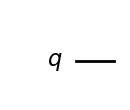

In [2]:
# １量子ビット回路を用意 
qc = QuantumCircuit(1)

qc.draw(output="mpl")    # 回路を描画

### Xゲート

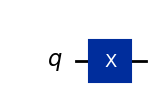

In [3]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

qc.draw(output="mpl")    # 回路を描画

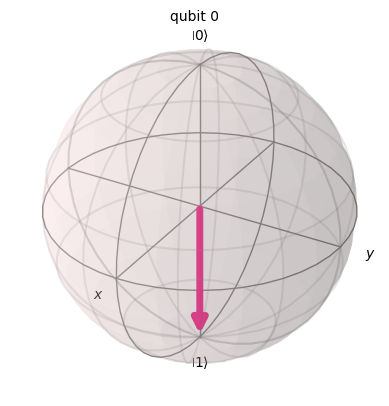

In [4]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

### Hゲート

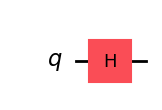

In [5]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意 

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

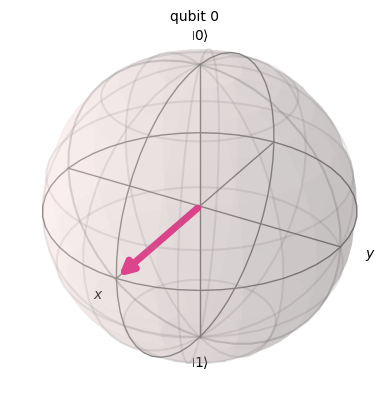

In [6]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

### XゲートとHゲート

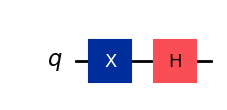

In [7]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意 

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

# 次にHゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

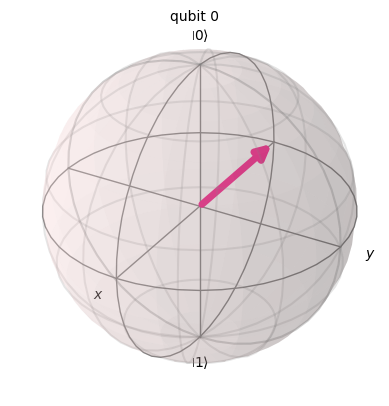

In [8]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

### 1量子ビットゲートの書き方

    qc.x(0)    # X軸の周りのPi回転
    qc.y(0)    # Y軸の周りのPi回転
    qc.z(0)    # Z軸の周りのPi回転
    qc.s(0)    # Z軸の周りのPi/2回転
    qc.sdg(0)  # Z軸の周りの-Pi/2回転
    qc.h(0)    # Hゲート
    qc.rx(theta, 0)    # X軸の周りのtheta回転
    qc.ry(theta, 0)    # Y軸の周りのtheta回転
    qc.rz(theta, 0)    # Z軸の周りのtheta回転

## 演習 1

次の回路を作ってブロッホ球を表示してみましょう。

1-1)

![image.jpg](https://raw.githubusercontent.com/quantum-tokyo/kawasaki-quantum-camp/refs/heads/main/day1/exe1_1.jpg)

1-2)

![image.jpg](https://raw.githubusercontent.com/quantum-tokyo/kawasaki-quantum-camp/refs/heads/main/day1/exe1_2.jpg)

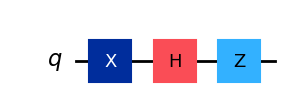

In [9]:
# 1-1)
qc = QuantumCircuit(1)    # １量子ビット回路を用意 

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# Zゲートを0番目の量子ビットに操作します。
qc.z(0)

# 回路を描画
qc.draw(output="mpl")

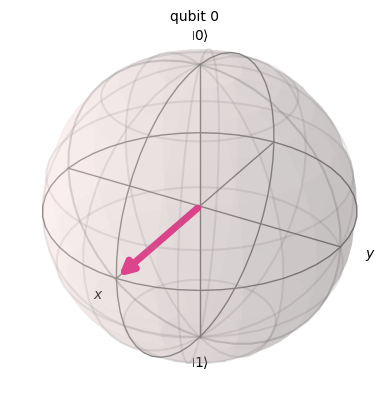

In [10]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

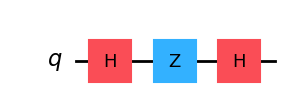

In [12]:
# 1-2)
qc = QuantumCircuit(1)    # １量子ビット回路を用意 

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# Zゲートを0番目の量子ビットに操作します。
qc.z(0)

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

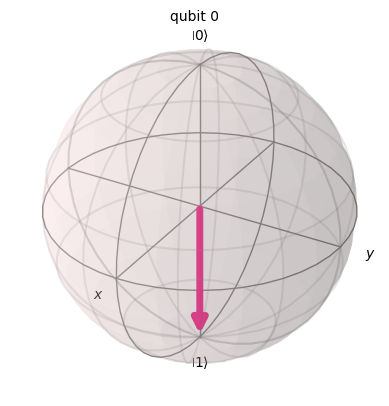

In [13]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

### 2量子ビット回路

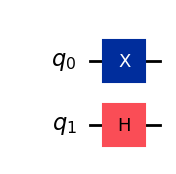

In [14]:
qc = QuantumCircuit(2)    # 2量子ビット回路を用意

qc.x(0)
qc.h(1)

qc.draw(output="mpl")

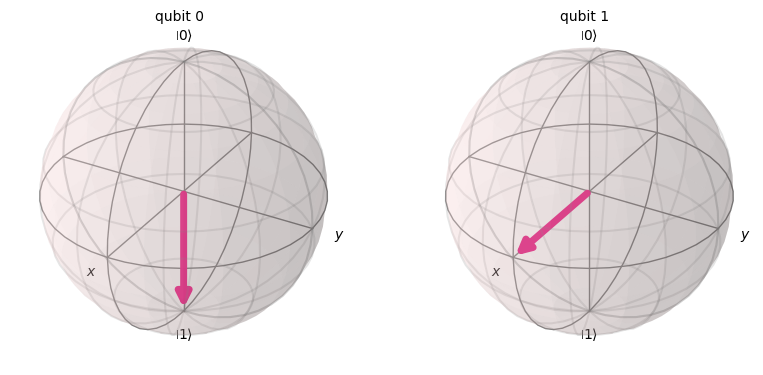

In [15]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)

# ブロッホ球の表示
plot_bloch_multivector(result)

### エンタングルメント

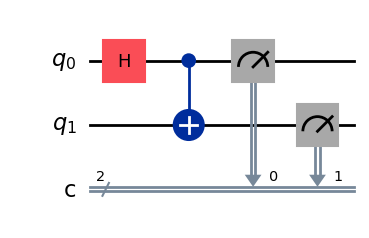

In [16]:
# ２量子ビット回路を作成します。
qc = QuantumCircuit(2,2)    # 2量子ビット, 2古典ビットレジスター

# ゲートを適用します。
qc.h(0)
qc.cx(0,1)    # 制御NOTゲート

# 測定ゲートを追加
qc.measure(0,0)    # 量子ビットq0を測定して、古典レジスターc0に入れます
qc.measure(1,1)    # 量子ビットq1を測定して、古典レジスターc1に入れます

# 回路を描画
qc.draw(output="mpl")

{'11': 517, '00': 507}


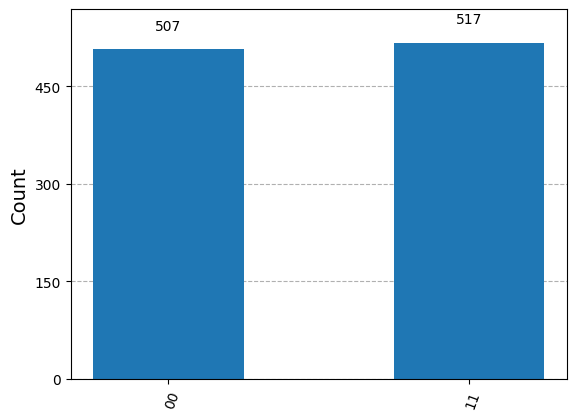

In [17]:
# シミュレーターで実験
backend = AerSimulator()
sampler = SamplerV2(backend)
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(counts)

# ヒストグラムで測定された確率をプロット
plot_histogram( counts )

In [18]:
# 初めて実行する場合は、認証情報をディスクに保存します：
# https://quantum.ibm.com/ のAPI Tokenをコピペします
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', token='<IBM Quantum API key>')

service = QiskitRuntimeService()
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_cusco')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_torino')>,
 <IBMBackend('test_eagle_us-east')>]

In [27]:
# 以下でデバイスを指定できます。
backend = service.backend('ibm_kyiv')  # 例）ibm_kyivを使う場合

In [ ]:
#一番空いているバックエンドを自動的に選択することもできます
backend = service.least_busy(operational=True)
print("最も空いているバックエンドは: ", backend)

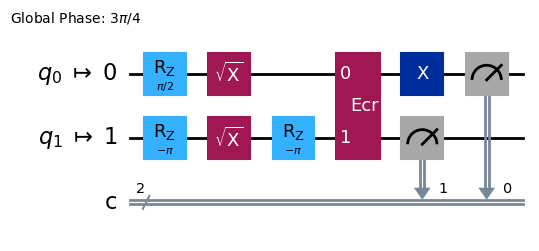

In [28]:
# 実機のバックエンドでの実行に最適な回路に変換します
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

In [29]:
# Samplerで実行します
sampler = SamplerV2(backend)
job = sampler.run([isa_circuit])

print("job id:", job.job_id()) # 実行に時間がかかるのでjob_idを表示します

job id: cyg755c9b62g0081zv1g


In [31]:
#job = service.job(job.job_id()) 
job = service.job("cyg755c9b62g0081zv1g")  # 例です。上に出力された自分のjob_idを入れて実行してください。
job.status() # ジョブの実行状態を確認します

'DONE'

上記のセルを何回か実行して、'DONE' が表示されたら、実機での実行が終わっているので、以下のセルを実行して結果を確認します。

In [32]:
### 'DONE'になってから実行します ###
result = job.result()
print(result[0].data.c.get_counts())

{'00': 1970, '11': 2004, '01': 86, '10': 36}


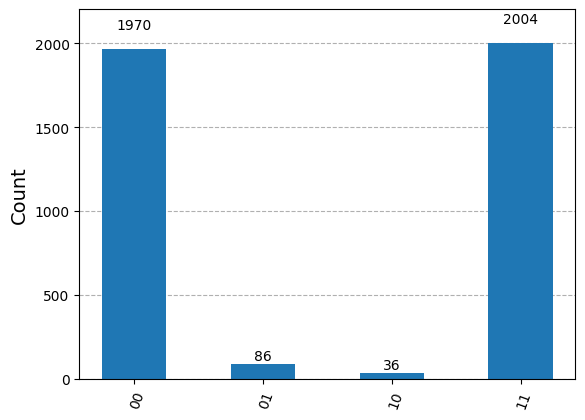

In [33]:
plot_histogram(result[0].data.c.get_counts())

実機での実行を待つ間に、演習に取り組んでみましょう。
## 演習 2

次の回路を作って量子シミュレーターで実行してみましょう。

![image.jpg](https://raw.githubusercontent.com/quantum-tokyo/kawasaki-quantum-camp/refs/heads/main/day1/exe2.jpg)


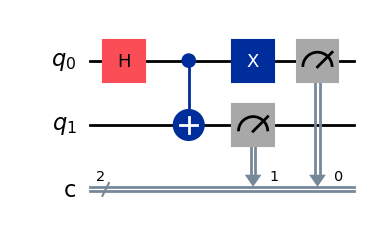

In [34]:
# ２量子ビット回路を古典ビット含めて作成します。
qc = QuantumCircuit(2,2)

# ゲートを適用します。
qc.h(0)
qc.cx(0,1)    # 制御NOTゲート
qc.x(0)

# 測定ゲートを追加
qc.measure(0,0)    # 量子ビットq0を測定して、古典レジスターc0に入れます
qc.measure(1,1)    # 量子ビットq1を測定して、古典レジスターc1に入れます

# 回路を描画
qc.draw(output="mpl")

{'10': 510, '01': 514}


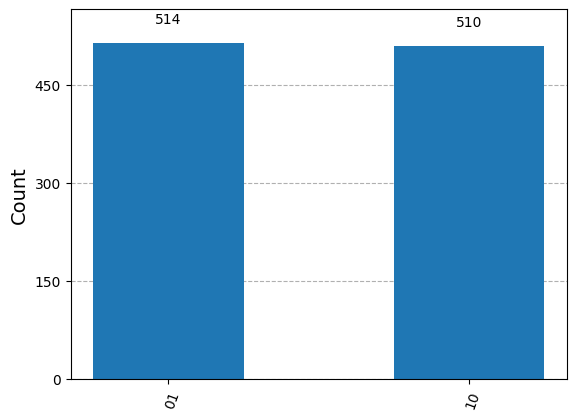

In [35]:
# シミュレーターで実験
backend = AerSimulator()
sampler = SamplerV2(backend)
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(counts)

# ヒストグラムで測定された確率をプロット
plot_histogram( counts )

## 演習 3

さらに時間の余った人は、次の回路を作って量子シミュレーターで実行してみましょう。この回路は、３量子ビットのエンタングルメントを作る回路で、作られる状態は、GHZ状態と呼ばれています。

![image.jpg](https://raw.githubusercontent.com/quantum-tokyo/kawasaki-quantum-camp/refs/heads/main/day1/exe3.jpg)

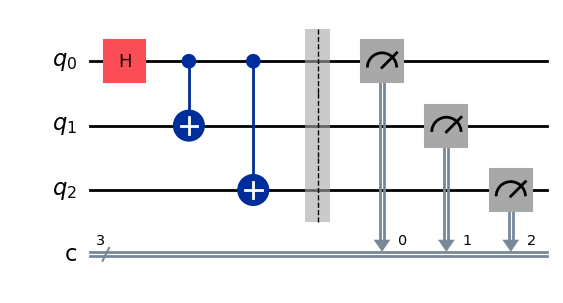

In [36]:
# 3量子ビット回路を古典ビット含めて作成します。
qc = QuantumCircuit(3,3)

# ゲートを適用します。
qc.h(0)
qc.cx(0,1)    
qc.cx(0,2)

qc.barrier()

# 測定ゲートを追加
qc.measure(0,0)    # 量子ビットq0を測定して、古典レジスターc0に入れます
qc.measure(1,1)    # 量子ビットq1を測定して、古典レジスターc1に入れます
qc.measure(2,2)    # 量子ビットq1を測定して、古典レジスターc1に入れます

# 回路を描画
qc.draw(output="mpl")

{'000': 500, '111': 524}


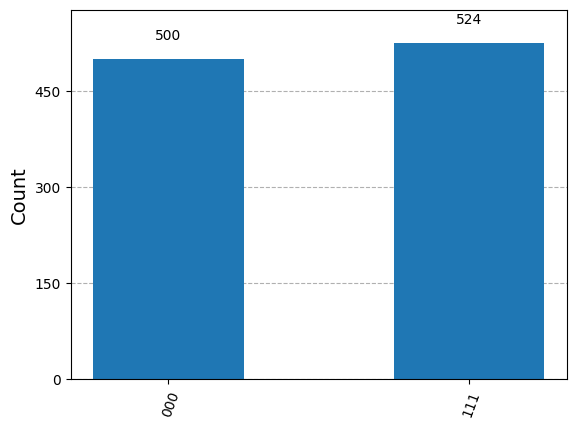

In [37]:
# シミュレーターで実験
backend = AerSimulator()
sampler = SamplerV2(backend)
job = sampler.run([qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(counts)

# ヒストグラムで測定された確率をプロット
plot_histogram( counts )

In [38]:
# Qiskitバージョンの確認
import qiskit
qiskit.__version__

'1.3.2'